# Bernoulli and Binomial Distribution - Lab

## Introduction
In this lab, you'll practice your newly gained knowledge on the Bernoulli and Binomial Distribution.

## Objectives
You will be able to:
* Apply the formulas for the Binomial and Bernoulli distribution
* Apply NumPy to randomly generate Binomial and Bernoulli trials
* Use Matplotlib to generate Binomial and Bernoulli trials with various probabilities

## Apply the formulas for the Binomial and Bernoulli distribution

When playing a game of bowling, what is the probability of throwing exactly 3 strikes in a game with 10 rounds? Assume that the probability of throwing a strike is 25% for each round. Use the formula for the Binomial distribution to get to the answer. You've created this before, so we provide you with the function for factorials again:

In [1]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

In [3]:
p_3_strikes = factorial(10)/(factorial(3)*factorial(7))*0.25**3*0.75**7 
p_3_strikes#answer = 0.2502822

0.25028228759765625

Now, create a function for the Binomial distribution with three arguments $n$, $p$ and $k$ just like in the formula:

$$ \large P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 


In [9]:
from itertools import combinations
import numpy as np
def binom_distr(n,p,k):
    total = len(list(combinations(np.arange(n),k)))
    return total*p**k*(1-p)**(n-k)

Validate your previous result applying your new function.

In [10]:
# Your code here
binom_distr(10,0.25,3)

0.25028228759765625

Now write a for loop along with your function to compute the probability that you have five strikes or more in one game. You'll want to use numpy here!

In [11]:
import numpy as np
# Your code here
total_p = 0
for i in range(5,11):
    total_p += binom_distr(10,0.25,i)
print(total_p)
    

0.07812690734863281


## Use a simulation to get the probabilities for all the potential outcomes

Repeat the experiment 5000 times.

In [15]:
# leave the random seed here 
np.random.seed(123)

result, count = np.unique(np.random.binomial(10,0.25,size=5000),return_counts=True)

In [17]:
# the results should look like this:
# [0 1 2 3 4 5 6 7 8]
# [ 310  941 1368 1286  707  297   78   11    2]
result, count

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([ 310,  941, 1368, 1286,  707,  297,   78,   11,    2]))

## Visualize these results

Create the PMF using these empiric results (that is, the proportions based on the values we obtained running the experiment 5000 times).

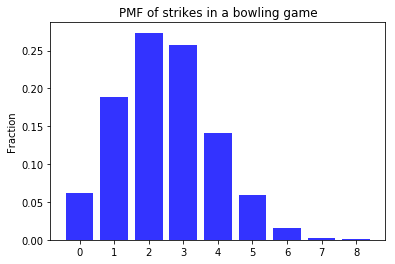

In [21]:
import matplotlib.pyplot as plt
plt.bar(result, count/5000, align='center', color = 'blue',alpha = 0.8)
plt.title('PMF of strikes in a bowling game')
plt.xticks(result)
plt.ylabel('Fraction')
plt.show()

You can see that, with a 25% strike hit rate, even when simulating 5000 times, an almost perfect and perfect game of 9 and 10 strikes didn't even occur once! If you change your seed, however, you'll see that occasionally perfect games will show up occasionally. 

Next, let's create the CDF based on these results. You can use `np.cumsum` to obtain cumulative probabilities.

In [22]:
# Your code here
cumsum = np.cumsum(count/5000)

## Summary

Congratulations! In this lab, you practiced your newly gained knowledge on the Bernoulli and Binomial Distribution.